# Scriping and Anaylyzing Basketball Statistic with Python 


# description 

Web scripting involves extracting data from website. in this assignment you will web scrape basketball statistics from wikipedia of some of the greatest basketball players. you will perform some anyasis on the data using pandas, PLT some basic questions then store the data on IBM cloud.

In [3]:
import bs4
import requests
import pandas as pd
import numpy as np
import boto3

In [4]:
def get_basketball_stats(link='https://en.wikipedia.org/wiki/Michael_Jordan'):
    # read the webpage 
    response = requests.get(link)
    
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    # the player stats are defined  with the attribute CSS class set to 'wikitable sortable'; 
    #therefore we create a tag object "table"
    table = soup.find(class_='wikitable sortable')

    #the headers of the table are the first table row (tr) we create a tag object that has the first row  
    headers = table.tr
    #the table column names are displayed  as an abbreviation; therefore we find all the abbr tags and returs an Iterator
    titles = headers.find_all("abbr")
    #we create a dictionary  and pass the table headers as the keys 
    data = {title['title']:[] for title in titles}
   #we will store each column as a list in a dictionary, the header of the column will be the dictionary key 

    #we iterate over each table row by fining each table tag tr and assign it to the objed
    for row in table.find_all('tr')[1:]:
    
        #we iterate over each cell in the table, as each cell corresponds to a different column we all obtain the correspondin key corresponding the column n 
        for key,a in zip(data.keys(),row.find_all("td")[2:]):
            # we append each elment and strip any extra HTML contnet 
            data[key].append(''.join(c for c in a.text if (c.isdigit() or c == ".")))

    # we remove extra rows by finding the smallest list     
    Min=min([len(x)  for x in data.values()])
    #we convert the elements in the key to floats 
    for key in data.keys():
    
        data[key]=list(map(lambda x: float(x), data[key][:Min]))
       
    return data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

The list links contain the link the wikipedia article for each player. the list names contains the names of each player.

In [6]:
links=['https://en.wikipedia.org/wiki/Michael_Jordan'\
       ,'https://en.wikipedia.org/wiki/Kobe_Bryant'\
      ,'https://en.wikipedia.org/wiki/LeBron_James'\
      ,'https://en.wikipedia.org/wiki/Stephen_Curry']
names=['Michael Jordan','Kobe Bryant','Lebron James','Stephen Curry']

for each player create a Python dictionary from the table Regular season table 

In [7]:
dicts = []

for link in links:
    dicts.append(get_basketball_stats(link))

In [9]:
dfs = []

for d in dicts:
    dfs.append(pd.DataFrame(d))

In [10]:
for i, df in enumerate(dfs):
    print('\n' + names[i])
    display(df.head())


Michael Jordan


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5



Kobe Bryant


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,71.0,6.0,15.5,0.417,0.375,0.819,1.9,1.3,0.7,0.3,7.6
1,79.0,1.0,26.0,0.428,0.341,0.794,3.1,2.5,0.9,0.5,15.4
2,50.0,50.0,37.9,0.465,0.267,0.839,5.3,3.8,1.4,1.0,19.9
3,66.0,62.0,38.2,0.468,0.319,0.821,6.3,4.9,1.6,0.9,22.5
4,68.0,68.0,40.9,0.464,0.305,0.853,5.9,5.0,1.7,0.6,28.5



Lebron James


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,79.0,79.0,39.5,0.417,0.290,0.754,5.5,5.9,1.6,0.7,20.9
1,80.0,80.0,42.4,0.472,0.351,0.750,7.4,7.2,2.2,0.7,27.2
2,79.0,79.0,42.5,0.480,0.335,0.738,7.0,6.6,1.6,0.8,31.4
3,78.0,78.0,40.9,0.476,0.319,0.698,6.7,6.0,1.6,0.7,27.3
4,75.0,74.0,40.4,0.484,0.315,0.712,7.9,7.2,1.8,1.1,30.0



Stephen Curry


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,80.0,77.0,36.2,0.462,0.437,0.885,4.5,5.9,1.9,0.2,17.5
1,74.0,74.0,33.6,0.480,0.442,0.934,3.9,5.8,1.5,0.3,18.6
2,26.0,23.0,28.2,0.490,0.455,0.809,3.4,5.3,1.5,0.3,14.7
3,78.0,78.0,38.2,0.451,0.453,0.900,4.0,6.9,1.6,0.2,22.9
4,78.0,78.0,36.5,0.471,0.424,0.885,4.3,8.5,1.6,0.2,24.0


Question 2: plot the Point per game for a player using the fuction plt.plot()

In [11]:
import matplotlib.pyplot as plt

Using the function plt.plot() plot the Point per game for one player just a note you can plot a dataframe column like a numpy array. you can aslo them each player.find out how to add a xlabel 'years' Point per game and a legend.

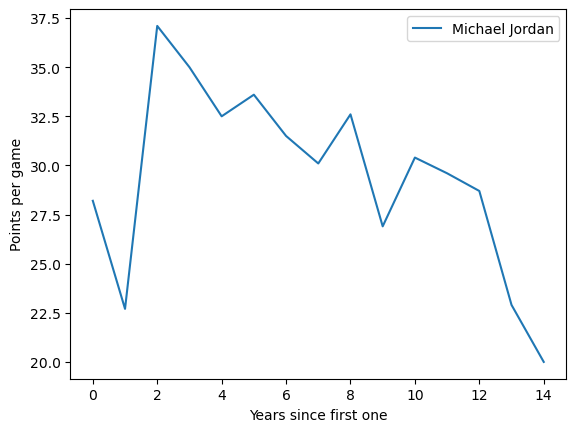

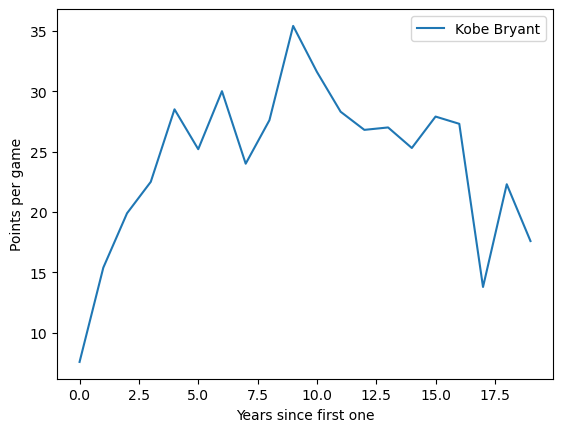

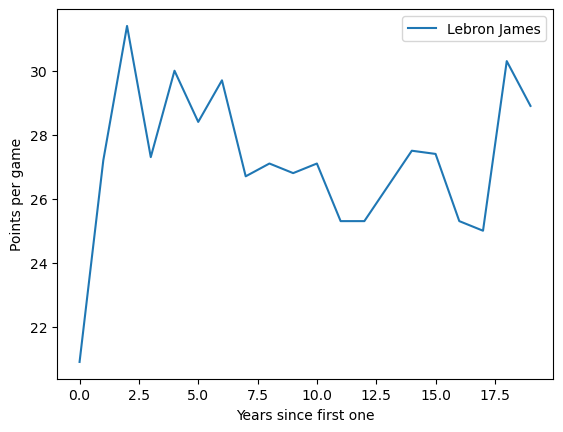

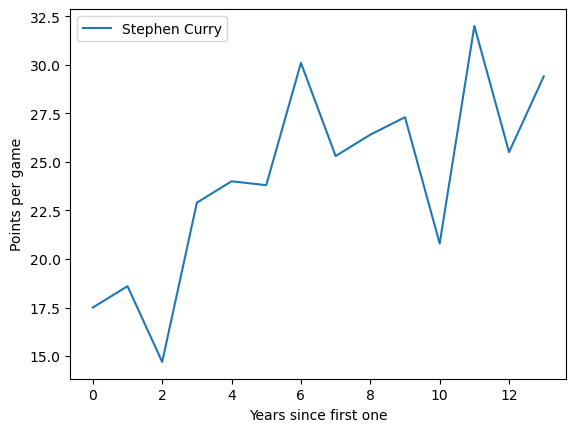

In [17]:
#Indivisual
for i, df in enumerate(dfs):
    plt.figure()
    plt.plot(df[['Points per game']],label=names[i])
    plt.legend()
    plt.xlabel('Years since first one')
    plt.ylabel('Points per game')


plt.show()

Question 3: Store the player Statistical in Object Storage (optional).

Save one player's dataframe as a csv file using the method
dataframe.to_csv(csv_name). The string that contains the name of the csv file should be assigned the csv_name

In [25]:
csv_name = []

for i, df in enumerate(dfs):
    csv_name.append(names[i].replace(' ','_')+'.csv')
    df.to_csv(csv_name[i])
    print(i)

0
1
2
3


In [22]:
dfs

[    Games played  Games started  Minutes per game  Field goal percentage  \
 0           82.0           82.0              38.3                  0.515   
 1           18.0            7.0              25.1                  0.457   
 2           82.0           82.0              40.0                  0.482   
 3           82.0           82.0              40.4                  0.535   
 4           81.0           81.0              40.2                  0.538   
 5           82.0           82.0              39.0                  0.526   
 6           82.0           82.0              37.0                  0.539   
 7           80.0           80.0              38.8                  0.519   
 8           78.0           78.0              39.3                  0.495   
 9           17.0           17.0              39.3                  0.411   
 10          82.0           82.0              37.7                  0.495   
 11          82.0           82.0              37.9                  0.486   

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# Function to scrape data from Wikipedia
def scrape_wikipedia(player_name):
    try:
        # Construct URL for the Wikipedia page of the player
        url = f"https://en.wikipedia.org/wiki/{player_name.replace(' ', '_')}"

        # Make HTTP request to fetch the page content
        response = requests.get(url)
        response.raise_for_status()  # Raise exception for HTTP errors

        # Parse HTML content
        soup = BeautifulSoup(response.content, 'html.parser')

        # Your scraping logic here to extract player statistics
        # Example:
        # stats_table = soup.find('table', class_='wikitable')
        # Extract data from the table and return

        return player_statistics  # Return the extracted data
    except Exception as e:
        return f"Error occurred while scraping data for {player_name}: {str(e)}"


In [28]:
def analyze_data(player_statistics):
    try:
        # Load data into Pandas DataFrame
        df = pd.DataFrame(player_statistics)

        # Perform analysis on the data
        # Example:
        # Calculate averages, plot distributions, etc.

        return analysis_results  # Return the analysis results
    except Exception as e:
        return f"Error occurred while analyzing data: {str(e)}"


In [33]:
# Function to plot results
def plot_results(analysis_results):
    try:
        # Plotting code here using Matplotlib
        # Example:
        plt.plot([1, 2, 3, 4])
        plt.xlabel('X-axis label')
        plt.ylabel('Y-axis label')
        plt.title('Title')
        plt.show()

        return "Plotting completed successfully"
    except Exception as e:
        return f"Error occurred while plotting results: {str(e)}"

Enter the name of the basketball player: maechal jorden
Scraping Wikipedia...
Data scraped successfully
Performing data analysis...
Data analysis completed
Plotting results...


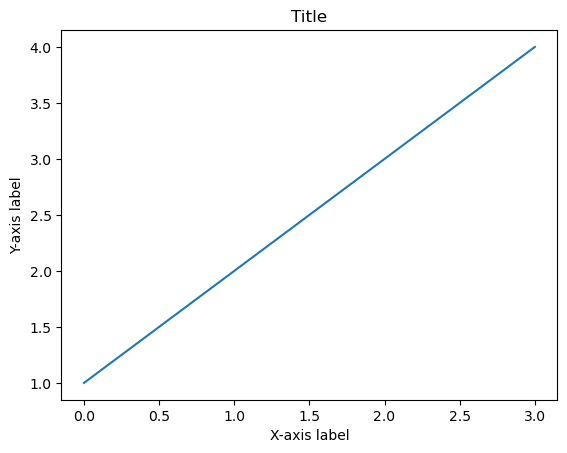

Results plotted successfully


In [34]:
# Main function
def main():
    player_name = input("Enter the name of the basketball player: ")

    # Step 1: Scrape data from Wikipedia
    print("Scraping Wikipedia...")
    player_statistics = scrape_wikipedia(player_name)
    print("Data scraped successfully")

    # Step 2: Analyze the data
    print("Performing data analysis...")
    analysis_results = analyze_data(player_statistics)
    print("Data analysis completed")

    # Step 3: Plot the results
    print("Plotting results...")
    plot_results(analysis_results)
    print("Results plotted successfully")

if __name__ == "__main__":
    main()